# EE4540 Project assignment

Joost Jaspers 5372925  
Zakaria Hayati

Standard imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import graph_is_connected

# Project Description

Consider the situation where we randomly place sensors in a square area of $100 \times 100 \ \mathrm{m}^2$ to measure a certain quantity (e.g., temperature, density, etc.).

---

### • Design of a Connected Sensor Network

Design a properly **connected sensor network** that covers the area of the plant using a reasonable number of sensors.

- **Task**: How many sensors are needed to guarantee a connected sensor network?
- **Deliverable**: Motivate and justify your choice based on theoretical or empirical reasoning.

---

# Plot of the placed sensors in the area

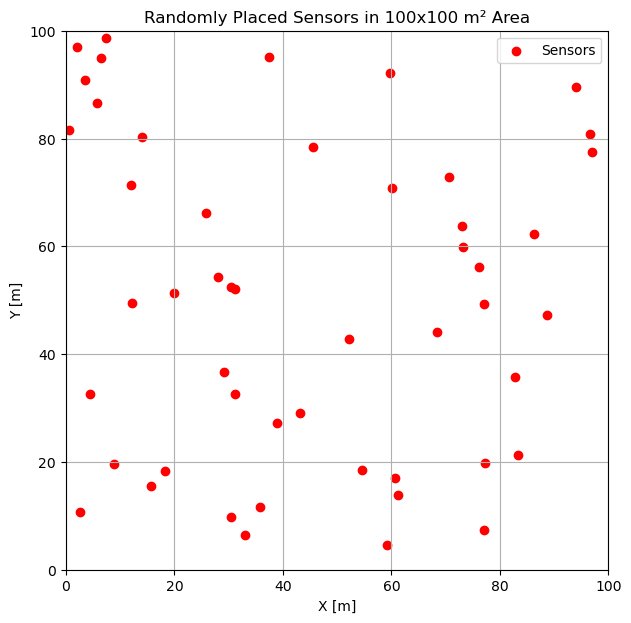

In [2]:
# Parameters
AREA_WIDTH = 100  # meters
NUM_SENSORS = 50  # Change this to your desired number of sensors
DIMENSION = 2

# Generate random sensor positions
np.random.seed(42)  # For reproducibility
coords = np.random.uniform(low = 0, high = AREA_WIDTH, size = (NUM_SENSORS, DIMENSION))

# Plot the grid and sensor positions
plt.figure(figsize=(7, 7))
plt.scatter(x = coords[:,0], y = coords[:,1], c='red', label='Sensors')
plt.xlim(0, AREA_WIDTH)
plt.ylim(0, AREA_WIDTH)
plt.title(f'Randomly Placed Sensors in {AREA_WIDTH}x{AREA_WIDTH} m² Area')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid(True)
plt.legend()
plt.show()


# Connect the sensors that are close enough to each other

The sensor network is connected.


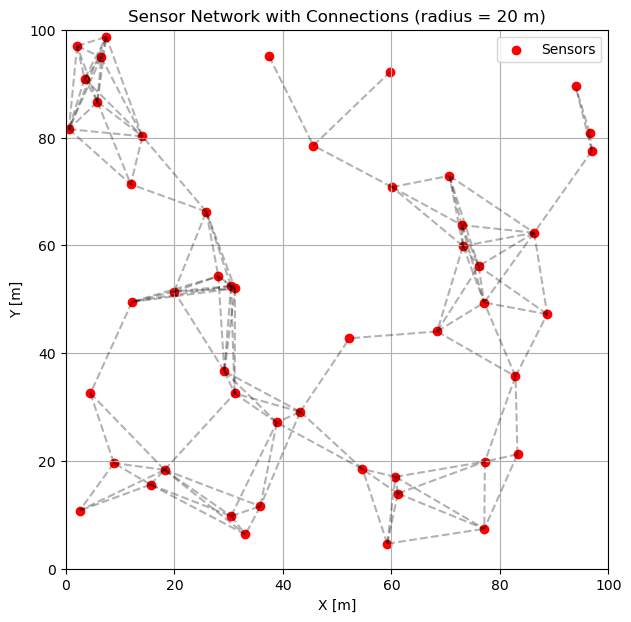

In [3]:
# Interconnect sensors that are within a certain communication radius
RADIUS = 20  # meters

plt.figure(figsize=(7, 7))
plt.scatter(x = coords[:,0], y = coords[:,1], c='red', label='Sensors')

# Vectorized computation of pairwise distances
dists = np.sqrt(np.sum((coords[:, None, :] - coords[None, :, :])**2, axis=-1))
adjacency = (dists <= RADIUS) & (dists > 0)

# Draw lines for all pairs within radius
for i in range(NUM_SENSORS):
    neighbors = np.where(adjacency[i])[0]
    for j in neighbors:
        if i < j:  # Avoid duplicate lines
            plt.plot([coords[i, 0], coords[j, 0]],
                     [coords[i, 1], coords[j, 1]],
                     'k--', alpha=0.3)
            


# Check if the graph is connected
is_connected = graph_is_connected(adjacency)
if is_connected:
    print("The sensor network is connected.")
else:
    print("The sensor network is not connected.")

plt.xlim(0, AREA_WIDTH)
plt.ylim(0, AREA_WIDTH)
plt.title(f'Sensor Network with Connections (radius = {RADIUS} m)')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid(True)
plt.legend()
plt.show()

A $d$-dimensional geometric random graph on $n$ nodes, denoted as $G^d(n, r)$, models a wireless ad-hoc network of nodes with wireless transmission radius $r$.

- Place $n$ nodes in a $d$-dimensional unit cube uniformly at random  
- Connect any two nodes that are within distance $r$ of each other  

---

### **Property:**

For $r^d \geq \dfrac{2 \log(n)}{n}$, the graph $G^d(n, r)$ is connected with probability at least  $1 - \dfrac{1}{n^2}$


In [4]:
DIMENSION = np.shape(coords)[1]  # Extract the number of dimensions

from helper import min_radius_for_sensors

# Calculate and print the minimum required radius
min_radius = min_radius_for_sensors(NUM_SENSORS, DIMENSION, AREA_WIDTH)


Minimum required radius for connectivity with probability: 99.96000000000001 (n=50, area=100x100): 39.56 m


In [5]:
# Given a desired communication radius, calculate the minimum number of sensors for connectivity (with high probability)

DESIRED_RADIUS = 20  
DIMENSION = np.shape(coords)[1]  # Number of dimensions (2D in this case)

from helper import min_sensors_for_radius

number_of_sensors = min_sensors_for_radius(DESIRED_RADIUS, AREA_WIDTH, DIMENSION)

Minimum number of sensors for radius 20 m: 283
Probability of connectivity with 283 sensors and radius 20 m: 99.9988%


Minimum number of sensors for radius 12.0 m: 953
Probability of connectivity with 953 sensors and radius 12.0 m: 99.9999%
Minimum number of sensors for radius 12.686868686868687 m: 837
Probability of connectivity with 837 sensors and radius 12.686868686868687 m: 99.9999%
Minimum number of sensors for radius 13.373737373737374 m: 739
Probability of connectivity with 739 sensors and radius 13.373737373737374 m: 99.9998%
Minimum number of sensors for radius 14.06060606060606 m: 657
Probability of connectivity with 657 sensors and radius 14.06060606060606 m: 99.9998%
Minimum number of sensors for radius 14.747474747474747 m: 587
Probability of connectivity with 587 sensors and radius 14.747474747474747 m: 99.9997%
Minimum number of sensors for radius 15.434343434343434 m: 527
Probability of connectivity with 527 sensors and radius 15.434343434343434 m: 99.9996%
Minimum number of sensors for radius 16.12121212121212 m: 475
Probability of connectivity with 475 sensors and radius 16.121212121

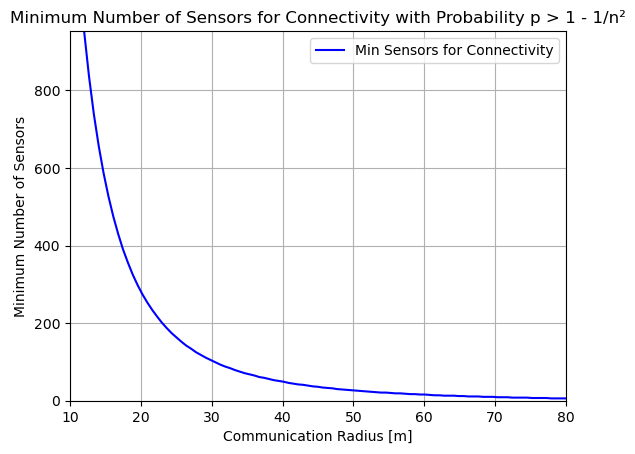

In [6]:
# Plot the minimum radius for connectivity
radius = np.linspace(12, 80, 100)  # Range of communication radii
min_sensors = [min_sensors_for_radius(r, AREA_WIDTH, DIMENSION) for r in radius]
#plt.rcParams.update({'font.size': 16})  # Sets global font size
#plt.rc('axes', labelsize=16)
plt.figure()
plt.plot(radius, min_sensors, label='Min Sensors for Connectivity', color='blue')
plt.title("Minimum Number of Sensors for Connectivity with Probability p > 1 - 1/n²")
plt.xlabel('Communication Radius [m]')
plt.ylabel('Minimum Number of Sensors')
plt.xlim(10, 80)
plt.ylim(0, max(min_sensors))
plt.grid(True)
plt.legend()
plt.savefig('figures/min_sensors_for_connectivity.pdf', dpi=600)
plt.show()
